PROOF : As the value of moire pattern increases or we can the complexity of morie pattern increases the model will more misclassify

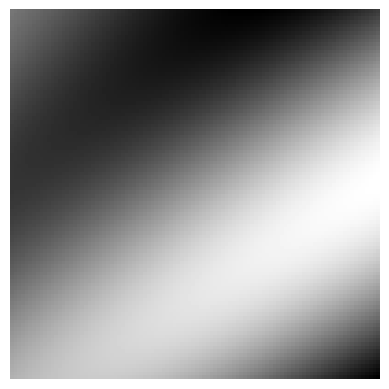

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Create a grid of x and y values
x, y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))

# Define two sine waves with slightly different frequencies and phases
w1 = np.sin(0.5*np.pi*x + 0.7*np.pi*y)
w2 = np.cos(0.1*np.pi*x + 0.4*np.pi*y)

# Combine the two waves to create a moiré pattern
moire = w1 + w2

# Display the pattern using Matplotlib
plt.imshow(moire, cmap='gray')
plt.axis('off')
plt.show()


In [9]:
import tensorflow as tf 
import numpy as np 

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# expand new axis, channel axis 
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# [optional]: we may need 3 channel (instead of 1)
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)

# it's always better to normalize 
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# resize the input shape , i.e. old shape: 28, new shape: 32
x_train = tf.image.resize(x_train, [32,32]) # if we want to resize 
x_test = tf.image.resize(x_test, [32,32]) # if we want to resize 

# one hot 
y_train = tf.keras.utils.to_categorical(y_train , num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test , num_classes=10)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 32, 32, 3) (60000, 10)
(10000, 32, 32, 3) (10000, 10)


In [10]:
input = tf.keras.Input(shape=(32,32,3))
efnet = tf.keras.applications.ResNet50(weights='imagenet',
                                             include_top = False, 
                                             input_tensor = input)
# Now that we apply global max pooling.
gap = tf.keras.layers.GlobalMaxPooling2D()(efnet.output)

# Finally, we add a classification layer.
output = tf.keras.layers.Dense(10, activation='softmax', use_bias=True)(gap)

# bind all
func_model = tf.keras.Model(efnet.input, output)

In [11]:
def generate_moire_pattern(img, freq=10, phase=9.5, amp=0.7):
    x, y = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
    moire_pattern = amp * np.sin(freq*np.pi*x + phase*np.pi*y)
    return img + np.repeat(moire_pattern[..., np.newaxis], 3, axis=-1)

moire_imgs = np.array([generate_moire_pattern(img) for img in x_test])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


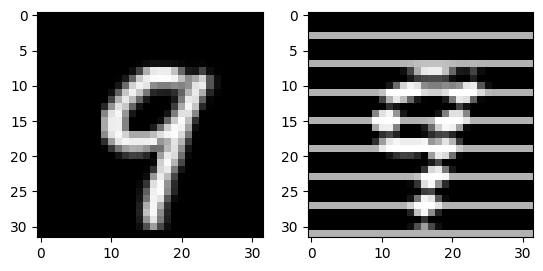

In [14]:
plt.subplot(1,2,1)
plt.imshow(x_test[12])
plt.subplot(1,2,2)
plt.imshow(moire_imgs[12])
plt.show()

In [16]:
func_model.compile(
          loss  = tf.keras.losses.CategoricalCrossentropy(),
          metrics = tf.keras.metrics.CategoricalAccuracy(),
          optimizer = tf.keras.optimizers.Adam())

func_model.fit(x_train, y_train, batch_size=128, epochs=5, verbose = 2)

Epoch 1/5


KeyboardInterrupt: 

In [47]:
# Evaluate the model on the test images with moiré patterns
test_loss_moire, test_acc_moire = func_model.evaluate(x_test, y_test)

test_acc_moire

313/313 [==============================] - 3s 8ms/step - loss: 9.6078 - accuracy: 0.2287


0.22869999706745148

In [ ]:
# Evaluate the model on the test images with moiré patterns
test_loss_moire, test_acc_moire = func_model.evaluate(moire_imgs, y_test)

test_acc_moire